<a href="https://colab.research.google.com/github/ArunAmballa/PlantDiseaseDetection/blob/main/PlantDise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <h1><b><font color='Black'>Installing Keras Tuner For Hyperparameter Tuning<b><h1>



In [ ]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 4.8 MB/s 
     |████████████████████████████████| 1.6 MB 27.2 MB/s 


<h1><b> Importing Required Libraries <b> </h1>

In [ ]:
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Flatten
from keras.applications.resnet_v2 import ResNet50V2
from keras_tuner import RandomSearch
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from PIL import Image
from keras.callbacks import ReduceLROnPlateau

<h1> <b>Mounting the Dataset From Drive<b> </h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1><b>Training Data Augmentation<b></h1>

In [ ]:
Train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

<h1><b>Test Data Augmentation<b></h1>

In [ ]:
Test_datagen=ImageDataGenerator(rescale=1./255)

<h1><b> Training Data Set<b></h1>

In [ ]:
x_train=Train_datagen.flow_from_directory(directory=r'/content/drive/MyDrive/Plant_Disease/train'
, target_size=(224,224), class_mode='categorical',color_mode='rgb',batch_size=32)

Found 5702 images belonging to 3 classes.


<h1> <b> Training Data Labels<b></h1>

In [ ]:
x_train.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

<h1><b> Test Data Set<b></h1>

In [ ]:
x_test=Test_datagen.flow_from_directory(directory=r'/content/drive/MyDrive/Plant_Disease/valid'
, target_size=(224,224), class_mode='categorical',color_mode='rgb',batch_size=32)

Found 1426 images belonging to 3 classes.



<h1><b> Test Data Labels<b></h1>

In [ ]:
x_test.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

<h1><b> CUSTOM MODEL USING KERAS<b></h1>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

<h1><b> Training<b></h1>

In [ ]:
model.fit(x_train,
          epochs=10,
          batch_size=32,
          validation_data=x_test)

Epoch 1/10
179/179 [==============================] - 1464s 8s/step - loss: 3.0244 - accuracy: 0.5130 - val_loss: 1.0876 - val_accuracy: 0.5259
Epoch 2/10
179/179 [==============================] - 72s 405ms/step - loss: 1.7153 - accuracy: 0.6291 - val_loss: 0.8173 - val_accuracy: 0.6907
Epoch 3/10
179/179 [==============================] - 73s 405ms/step - loss: 1.0101 - accuracy: 0.6827 - val_loss: 0.6607 - val_accuracy: 0.7146
Epoch 4/10
179/179 [==============================] - 72s 403ms/step - loss: 0.8227 - accuracy: 0.7429 - val_loss: 0.7579 - val_accuracy: 0.7482
Epoch 5/10
179/179 [==============================] - 72s 404ms/step - loss: 0.6211 - accuracy: 0.7946 - val_loss: 3.2142 - val_accuracy: 0.5996
Epoch 6/10
179/179 [==============================] - 73s 406ms/step - loss: 0.5823 - accuracy: 0.8120 - val_loss: 1.9276 - val_accuracy: 0.7644
Epoch 7/10
179/179 [==============================] - 72s 403ms/step - loss: 0.4917 - accuracy: 0.8369 - val_loss: 0.4438 - val_acc

<h1><b> Saving the Model<b></h1>

In [ ]:
model.save('custom.h5')

<h1><b> Testing <b></h1>

In [ ]:
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np

<h1><b> Loading the Model-1 <b></h1>

In [ ]:
model=load_model(r'/content/drive/MyDrive/Colab Notebooks/custom.h5')

In [ ]:
def detect(image):
  image=cv2.resize(image,(224,224))
  image=np.array([image])
  if(np.max(image)>1):
    image=image/255.0
  predict=model.predict(image)
  prediction=np.argmax(predict,axis=1)
  data=['Early','Late','Healthy']
  prediction=data[prediction[0]]
  print(prediction)

<h1> <b> Testing Result- Incorrect Prediction<b></h1>

1/1 [==============================] - 0s 246ms/step
Healthy


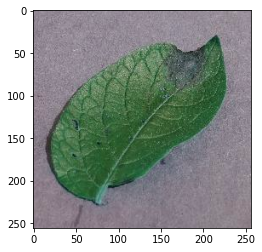

In [ ]:
frame=cv2.imread(r'/content/drive/MyDrive/Plant_Disease/valid/Potato___Late_blight/00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG')
plt.imshow(frame)
data=detect(frame)

<h1><b>MODEL 2-FREEZING THE LAYERS IN FEATURE EXTRACTION AND TRAINING CLASSIFIER WEIGHTS<b></h1>

<h1><b> Downloading the Pre-Trained Model -ResNet50V2<b></h1>

In [ ]:
IMAGE_SIZE=[224,224]
Pretrained_Model =ResNet50V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94668760/94668760 [==============================] - 0s 0us/step


<h1> Freezing all the layers of Feature Extraction Part<b></h1>

In [ ]:
for layer in Pretrained_Model.layers:
    layer.trainable = False

<h1><b>Flattening the Last Layer<b></h1>

In [ ]:
x = Flatten()(Pretrained_Model.output)

<h1><b> Adding a Dense Layer on Top of it with Three Nodes<b></h1>

In [ ]:
Prediction = Dense(3, activation='softmax')(x)
Pre_Trained_Model_1 = Model(inputs=Pretrained_Model.input, outputs=Prediction)

<h1><b> Network Architecture<b></h1>

In [ ]:
Pre_Trained_Model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

<h1><b> Implementing Keras Tuner for Finding Best Hyper-Parameters<b></h1>

In [ ]:
  def build_model(hp):
     Pre_Trained_Model_1.compile(loss='categorical_crossentropy',
     optimizer=keras.optimizers.Adam(hp.Choice('learning rate',values=[1e-2,1e-3,1e-4,1e-5,1e-6])),
                                     metrics=['accuracy'])
     return Pre_Trained_Model_1

In [ ]:
Tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=7)

<h1> <b> Accuracy of the Model<b></h1>

In [ ]:
Tuner.search(x_train,epochs=5,batch_size=32,validation_data=x_test)

Trial 5 Complete [00h 12m 26s]
val_accuracy: 0.9677419066429138

Best val_accuracy So Far: 0.9824684262275696
Total elapsed time: 01h 17m 35s


<h1><b> Saving the Model-2<b></h1>

In [ ]:
 Pre_Trained_Model_1.save('PreTrained_1.h5')
 

<h1><b> Loading the Model <b></h1>

In [ ]:
model=load_model(r'/content/drive/MyDrive/Colab Notebooks/PreTrained_1.h5')

<h1> <b> Testing the Model<b></h1>

In [ ]:
def detect(image):
  image=cv2.resize(image,(224,224))
  image=np.array([image])
  if(np.max(image)>1):
    image=image/255.0
  predict=model.predict(image)
  prediction=np.argmax(predict,axis=1)
  data=['Early','Late','Healthy']
  prediction=data[prediction[0]]
  print(prediction)

<h1> <b> Testing Results<b></h1>

1/1 [==============================] - 1s 997ms/step
Late


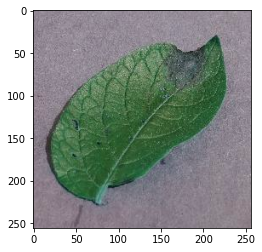

In [ ]:
frame=cv2.imread(r'/content/drive/MyDrive/Plant_Disease/valid/Potato___Late_blight/00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG')
plt.imshow(frame)
data=detect(frame)

<h1><b> MODEL-3 FINE TUNING THE WHOLE NETWORK<b></h1>

<h1><b> Loading the Model <b></h1>

In [ ]:
IMAGE_SIZE=[224,224]
Pre_Trained_Model_3 =ResNet50V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94668760/94668760 [==============================] - 0s 0us/step


<h1><b> Flattening the Last Layer<b></h1>

In [ ]:
x_3 = Flatten()(Pre_Trained_Model_3.output)

<h1><b> Adding the Output Layer at the End with Three Nodes<b></h1>

In [ ]:
Prediction_3 = Dense(3, activation='softmax')(x_3)
Pre_Trained_Model_3 = Model(inputs=Pre_Trained_Model_3.input, outputs=Prediction_3)

<h1><b> Network Architecture <b></h1>

In [ ]:
Pre_Trained_Model_3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

<h1><b> Hyper-Parameter Tuning Using Keras-Tuner<b></h1>

In [ ]:
 def Build_model_3(hp):
     Pre_Trained_Model_3.compile(loss='categorical_crossentropy',
     optimizer=keras.optimizers.Adam(hp.Choice('learning rate',values=[2e-5])),
                                     metrics=['accuracy'])
     return Pre_Trained_Model_3

In [ ]:
Tuner_3 = RandomSearch(
    Build_model_3,
    objective='val_accuracy',
    max_trials=5)

<h1><b> Accuracy on the Test Data <b></h1>

In [ ]:
Tuner_3.search(x_train,epochs=5,batch_size=32,validation_data=x_test)

Trial 1 Complete [00h 23m 41s]
val_accuracy: 0.9964936971664429

Best val_accuracy So Far: 0.9964936971664429
Total elapsed time: 00h 23m 41s


<h1><b> Importing the Required Libraries <b></h1>

In [ ]:
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np

<h1><b>Saving the Model <b></h1>

In [ ]:
Pre_Trained_Model_3.save('PreTrained_3.h5')

<h1><b> Loading the Model <b></h1>

<h1><b> Prediction on Test Data <b></h1>

In [ ]:
Pre_Trained_Model_3=load_model(r'/content/drive/MyDrive/Colab Notebooks/PreTrained_3.h5')

In [ ]:
def detect_3(image):
  image=cv2.resize(image,(224,224))
  image=np.array([image])
  if(np.max(image)>1):
    image=image/255.0
  predict=Pre_Trained_Model_3.predict(image)
  prediction=np.argmax(predict,axis=1)
  data=['Early','Late','Healthy']
  prediction=data[prediction[0]]
  print(prediction)

1/1 [==============================] - 9s 9s/step
Late


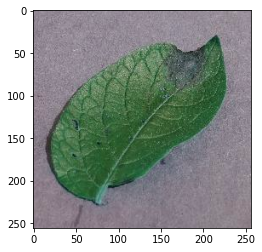

In [ ]:
import cv2
frame=cv2.imread(r'/content/drive/MyDrive/Plant_Disease/valid/Potato___Late_blight/00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG')
plt.imshow(frame)
data=detect_3(frame)

<h1><b>MODEL -4 TRAINING THE WHOLE NETWORK FROM SCRATCH<b></h1>

<h1><b> Loading the Model Without Weights<b></h1>

In [ ]:
IMAGE_SIZE=[224,224]
Pre_Trained_Model_4 =ResNet50V2(input_shape=IMAGE_SIZE + [3], weights=None, include_top=False)

<h1><b> Flattening the Last Layer<b></h1>

In [ ]:
x_4= Flatten()(Pre_Trained_Model_4.output)

<h1><b> Adding the Dense layer with 3 Nodes --Output Layer <b></h1>

In [ ]:
Prediction_4 = Dense(3, activation='softmax')(x_4)
Pre_Trained_Model_4 = Model(inputs=Pre_Trained_Model_4.input, outputs=Prediction_4)

<h1><b> Network Architecture <b></h1>

In [ ]:
Pre_Trained_Model_4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

<h1><b> Hyper-Parameter Tuning Using Keras Tuner<b></h1>

In [ ]:
  def Build_model_4(hp):
     Pre_Trained_Model_4.compile(loss='categorical_crossentropy',
     optimizer=keras.optimizers.Adam(hp.Choice('learning rate',values=[1e-2,1e-3,1e-4,1e-5,1e-6])),
                                     metrics=['accuracy'])
     return Pre_Trained_Model_4

In [ ]:
Tuner_4 = RandomSearch(
    Build_model_4,
    objective='val_accuracy',
    max_trials=5)

<h1><b> Accuracy on the Test Data <b></h1>

In [ ]:
Tuner_4.search(x_train,epochs=5,batch_size=32,validation_data=x_test)

Trial 5 Complete [00h 06m 17s]
val_accuracy: 0.9593268036842346

Best val_accuracy So Far: 0.9593268036842346
Total elapsed time: 00h 31m 14s


<h1><b> Importing the Required Libraries<b></h1>

In [ ]:
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np

<h1><b> Saving the Model <b></h1>

In [ ]:
Pre_Trained_Model_4.save('PreTrained_4.h5')

<h1><b> Loading the Saved Model <b></h1>

In [ ]:
Pre_Trained_Model_4=load_model(r'/content/drive/MyDrive/Colab Notebooks/PreTrained_4.h5')

<h1><b> Prediction on Test Data <b></h1>

In [ ]:
def detect_4(image):
  image=cv2.resize(image,(224,224))
  image=np.array([image])
  if(np.max(image)>1):
    image=image/255.0
  predict=Pre_Trained_Model_4.predict(image)
  prediction=np.argmax(predict,axis=1)
  data=['Early','Late','Healthy']
  prediction=data[prediction[0]]
  print(prediction)

1/1 [==============================] - 1s 786ms/step
Late


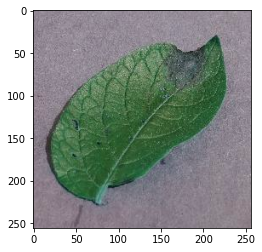

In [ ]:
import cv2
frame=cv2.imread(r'/content/drive/MyDrive/Plant_Disease/valid/Potato___Late_blight/00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG')
plt.imshow(frame)
data=detect_4(frame)